# Mapping the land model results from 1D to 2D: an example of urban landunits   
Author: Dr. Zhonghua Zheng (zhonghua.zheng@outlook.com) 

reference: https://github.com/NCAR/ctsm_python_gallery/blob/master/notebooks/PFT-Gridding.ipynb

In [1]:
import xarray as xr
import numpy as np
from numpy import empty
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

## load data

In [2]:
%%time
ds = xr.open_dataset("/glade/scratch/zhonghua/b.e21.BHISTcmip6.f09_g17.LE2-1231.003.clm2.h6.TREFMXAV.19900101-19991231.nc")

CPU times: user 57.3 ms, sys: 21.4 ms, total: 78.7 ms
Wall time: 81.5 ms


## define parameters

In [3]:
var_str = "TREFMXAV"

lat = ds.lat
lon = ds.lon
time = ds.time
ixy = ds.land1d_ixy
jxy = ds.land1d_jxy
landtype = ds.land1d_ityplunit
var = ds[var_str]

nlat = len(lat.values)
nlon = len(lon.values)
ntim   = len(time.values)
nland = np.int(np.max(landtype))+1 # land from 0 to 9, so the dimension is 10

## mapping

In [4]:
%%time
# create an empty array
gridded = np.full([ntim,nland,nlat,nlon],np.nan)

# index should from 0 to max-1
gridded[:,landtype.values.astype(int),jxy.values.astype(int) - 1,ixy.values.astype(int) - 1] = var.values
print(gridded.shape)

(3650, 10, 192, 288)
CPU times: user 9.78 s, sys: 4.01 s, total: 13.8 s
Wall time: 13.8 s


## adding dimensions and coordinates

In [5]:
grid_dims = xr.DataArray(gridded, dims=("time","lndtype","lat","lon"))
grid_dims = grid_dims.assign_coords(time=ds.time,
                                    lndtype=[i for i in range(10)],
                                    lat=lat.values,
                                    lon=lon.values)
grid_dims.name = var_str

## test the results

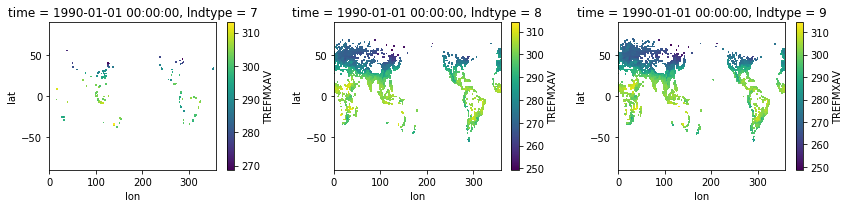

In [6]:
fig = plt.figure(figsize=(12,3))
# lndtype = 7
ax = fig.add_subplot(131)
grid_dims.sel(lndtype=7,time=ds.time[0]).plot(ax=ax)
# lndtype = 8
ax = fig.add_subplot(132)
grid_dims.sel(lndtype=8,time=ds.time[0]).plot(ax=ax)
# lndtype = 9
ax = fig.add_subplot(133)
grid_dims.sel(lndtype=9,time=ds.time[0]).plot(ax=ax)
plt.tight_layout()
plt.show()

## save the data

In [7]:
%%time
# urban landunits (which are 7, 8, and 9 - see the global attributes)
grid_dims.sel(lndtype=[7,8,9]).to_netcdf("/glade/scratch/zhonghua/urban_2d/full.nc")

CPU times: user 1.47 s, sys: 3.4 s, total: 4.87 s
Wall time: 4.96 s
